## Search Tree --> Similar Words

In [1]:
database = '/Users/tracy/GithubFiles/sqlResult_1558435.csv'

In [2]:
import pandas as pd

In [3]:
content = pd.read_csv(database)

In [4]:
content = content.fillna(value='')

In [5]:
new_content = content['content'].tolist()

In [6]:
import jieba

In [7]:
def cut(string): return ' '.join(jieba.cut(string))

In [8]:
cut('测试结果是什么')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wy/v0gb2_ds3716l6fjs3x1nvkc0000gn/T/jieba.cache
Loading model cost 0.629 seconds.
Prefix dict has been built succesfully.


'测试 结果 是 什么'

In [9]:
import re

In [10]:
def token(string):
    return re.findall(r'[\d|\w]+',string)

In [11]:
token('测试结果是什么\n\n\n')

['测试结果是什么']

In [12]:
new_content = [token(n) for n in new_content]

In [13]:
new_content = [ ' '.join(n) for n in new_content]

In [14]:
new_content = [cut(n) for n in new_content]

In [15]:
new_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [16]:
with open('news_sentences_cut.txt','w') as file:
    for n in new_content:
        file.write(n + '\n')

In [17]:
from gensim.models import Word2Vec

/Users/tracy/anaconda3/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [18]:
from gensim.models.word2vec import LineSentence

In [19]:
model = Word2Vec(LineSentence('news_sentences_cut.txt'),size=100,workers=8)

In [20]:
model.most_similar('葡萄牙'node,topn=20)

/Users/tracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('捷克', 0.8726468086242676),
 ('意大利', 0.8483333587646484),
 ('摩洛哥', 0.8473615646362305),
 ('克罗地亚', 0.8366175889968872),
 ('乌拉圭', 0.8350417613983154),
 ('西班牙', 0.8236398696899414),
 ('奥地利', 0.8179361820220947),
 ('瑞士', 0.8083271384239197),
 ('丹麦', 0.8010289669036865),
 ('科特迪瓦', 0.7984296083450317),
 ('苏格兰', 0.7981919050216675),
 ('拉脱维亚', 0.7981241941452026),
 ('罗马尼亚', 0.796991229057312),
 ('比利时', 0.7861006259918213),
 ('比什凯克', 0.7805203199386597),
 ('瑞典', 0.7779747843742371),
 ('巴塞罗那', 0.7728537321090698),
 ('中国香港', 0.7665457725524902),
 ('马德里', 0.7660341262817383),
 ('多哈', 0.7619228959083557)]

In [21]:
from collections import defaultdict
#top越往后，发生错误的概率越大，写一个循环的程序搜索出最靠近的同义词
def get_related_words(initial_words,model):
    """
    @initial_words are initial words we already know
    @model is the word2vec model
    """
    unseen = initial_words
    seen = defaultdict(int)
    
    max_size = 500
    
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0 :
            print('seen length: {}'.format(len(seen)))
            
        node = unseen.pop(0)
        
        new_expanding = [ w for w, s in model.most_similar(node,topn=20)]
        
        unseen +=  new_expanding

        seen[node] += 1 
    
    #此处可以用动态规划来优化
        #optimal :1.score funciton could be revised
        #         2.using dynamic programing 
        
    return seen

In [22]:
#根据现有的词汇获得更多接近的同义词
related_words = get_related_words(['说','表示'],model)

/Users/tracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


seen length: 0
seen length: 50
seen length: 100
seen length: 100
seen length: 150
seen length: 150
seen length: 200
seen length: 250
seen length: 300
seen length: 350
seen length: 400
seen length: 450


In [23]:
#基于embedding + 动态优化
sorted(related_words.items(),key=lambda x:x[1],reverse=True)

[('说', 102),
 ('表示', 94),
 ('指出', 93),
 ('坦言', 92),
 ('认为', 85),
 ('透露', 82),
 ('看来', 77),
 ('所说', 68),
 ('称', 65),
 ('提到', 63),
 ('介绍', 61),
 ('告诉', 59),
 ('特别强调', 58),
 ('明说', 52),
 ('中说', 48),
 ('强调', 45),
 ('文说', 41),
 ('提及', 31),
 ('普遍认为', 30),
 ('深有体会', 28),
 ('称赞', 28),
 ('时说', 27),
 ('写道', 27),
 ('建议', 26),
 ('中称', 26),
 ('表明', 25),
 ('说道', 23),
 ('而言', 18),
 ('觉得', 18),
 ('引用', 18),
 ('眼中', 17),
 ('问', 17),
 ('对此', 16),
 ('直言', 16),
 ('宣称', 16),
 ('知情', 16),
 ('时称', 16),
 ('列举', 16),
 ('如是说', 15),
 ('声称', 15),
 ('回答', 15),
 ('谈到', 14),
 ('地说', 14),
 ('谈谈', 14),
 ('解释', 14),
 ('计划处', 13),
 ('质疑', 13),
 ('描述', 13),
 ('知道', 13),
 ('还称', 12),
 ('说明', 11),
 ('来说', 11),
 ('来讲', 11),
 ('咨询', 11),
 ('八面玲珑', 11),
 ('祁', 11),
 ('反复强调', 11),
 ('问道', 10),
 ('给出', 10),
 ('还是', 9),
 ('看到', 9),
 ('留意到', 9),
 ('郭', 9),
 ('彩霞', 9),
 ('志军', 9),
 ('慎重', 9),
 ('正如', 9),
 ('请问', 9),
 ('承认', 9),
 ('看法', 8),
 ('苏西洛', 8),
 ('见到', 8),
 ('冯武', 8),
 ('得知', 8),
 ('供图', 8),
 ('证实', 8),
 ('接受', 8),
 ('具名',

## TFIDF Key Words

TF  term frequency 词频 --某一个指定的词在文档中出现的次数（通常会进行归一化处理，防止他倾向长的文件）
$$ 该词在一篇文档中出现的总次数 $$

IDF Inverse Document Frequency 逆向文档频率,是指一个词语在全部文档中出现次数的度量
$$ log10(\frac{总文档数量}{含有该词的文档数})$$

TF-IDF 公式
 $$ TF \times  IDF$$


In [24]:
new_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [25]:
def document_frequency(word):
    return sum(1 for n in new_content if word in n)

document_frequency('的')

70342

In [26]:
import math

In [27]:
def idf(word):
    return math.log10(len(new_content) / document_frequency(word))

In [28]:
idf('的') < idf('小米')

True

In [29]:
def tf(word,document):
    """Get the term frequency of a @word in a @document"""
    words = document.split()
    return sum(1 for w in words if w==word)

In [30]:
tf('创业板',new_content[11])

6

In [31]:
idf('短期')
idf('银行')

1.4550169427748936

In [32]:
def get_keywords_of_a_document(document):
    words = document.split()
    tfidf = [
        (w,tf(w,document) * idf(w)) for w in words
    ]
    
    seen = [ ]
    new_tfidf = []
    for w,f in tfidf:
        if w not in seen :
            seen.append(w)
            new_tfidf.append((w,f))
    new_tfidf = sorted(new_tfidf,key=lambda x: x[1], reverse = True)
    return new_tfidf 

In [33]:
new_content[9]

'6 月 21 日   A股 纳入 MSCI 指数 尘埃落定   但 当天 被 寄予厚望 的 券商 股 并未 扛起 反弹 大旗   22 日   在 222 只 纳入 MSCI 指数 的 A股 股票 中   银行 股 全线 飘红   其中 招商银行 领涨   涨幅 达 6   66   保险 股 和 券商 股 的 表现 也 可圈可点   在 这 222 只 股票 中   金融 板块 的 股票 数量 和 总 市值 占 比均 位居 首位   分析 人士 指出   银行 股 股息 率高   估值 低   收益 稳定   对于 资金量 较大   投资 期限 较长 的 资金 存在 相当 大 的 吸引力   从 国际 经验 来看   纳入 MSCI 指数 后   相关 股市 的 投资者 风格 将 更加 稳健   更加 偏好 业绩 稳定   流动性 好   风险 低 的 优质 蓝筹股   银行 股具 估值 优势   6 月 22 日   A股 金融股 表现 强势   板块 涨幅 达 1   19   据 平安 证券 统计   在 222 只 纳入 MSCI 指数 的 A股 股票 中   金融 板块 市值 占 比达 41   32   其中 银行   证券 和 保险 子 板块 的 市值 占 比 分别 为 27   30   7   75   和 6   24   多家 券商 研究 报告 认为   银行 等 金融股 受到 纳入 MSCI 指数 的 提振   未来 更 多 境外 资金 将 进入 金融股   华泰 证券 表示   在 纳入 MSCI 指数 之后   A股 将 迎来 约 850 亿元 人民币 的 增量 资金   其中   考虑 到 222 只 股票 中   金融股 市值 占 比约 42   并且 金融股 体量 大   流动性 强   估值 低   符合 境外 资金 偏好   有望 迎来 超过 权重 的 资金 比例   预计 金融股 有望 吸引 增量 资金 约 350 亿元 人民币   新富 资本 证券 投资 中心 研究 总监 廖 云龙 认为   银行 股 脱颖而出 的 主要 原因 是 低 估值   市场 预期 银行 股 基本面 改善   同时 市场 整体 风格 偏 保守   偏爱 低 估值   22 日 银行 股 的 大涨 是 市场 风格 的 延续   是 投资者 对 龙头

In [34]:
get_keywords_of_a_document(new_content[9])

[('金融股', 17.63714459452381),
 ('银行', 17.460203313298724),
 ('MSCI', 16.211647928901478),
 ('估值', 15.097192060510306),
 ('A股', 11.594464341064434),
 ('222', 11.28811022118987),
 ('纳入', 11.282875898918089),
 ('股', 10.79373560937833),
 ('指数', 10.668064357878562),
 ('股票', 10.304119330599546),
 ('市值', 10.267020200776646),
 ('板块', 8.676690530868864),
 ('资金', 8.600716500606357),
 ('重仓股', 7.904722647584947),
 ('券商', 7.859768591630605),
 ('证券', 7.701678783333777),
 ('低', 6.668264918832575),
 ('QFII', 6.4083465935725465),
 ('风格', 6.2215185848738015),
 ('偏好', 5.862344049445071),
 ('增量', 5.122852433378189),
 ('占', 5.053275939057207),
 ('股具', 4.9523613237924735),
 ('流动性', 4.567950814204947),
 ('新富', 4.350301332464511),
 ('股是', 4.350301332464511),
 ('境外', 4.2950812901426225),
 ('choice', 4.04927133680053),
 ('涨幅', 3.9914254891745404),
 ('资金量', 3.9109686386342486),
 ('保险', 3.8849713801606267),
 ('比均', 3.873180077744849),
 ('投资者', 3.840291240988984),
 ('防御性', 3.838417971485637),
 ('只', 3.8160591455844

In [35]:
#假如发现程序运行很慢，jupyter自带有prun看哪个程序运行慢
# %prun get_keywords_of_a_document(new_content[8])

In [36]:
machine_news_keywords = get_keywords_of_a_document(new_content[101])

In [37]:
machine_news_keywords

[('机械', 19.73268423154147),
 ('工业', 13.726799287798574),
 ('百强', 12.218936930008129),
 ('机械行业', 11.732905915902746),
 ('王瑞祥', 9.904722647584947),
 ('中机联', 9.904722647584947),
 ('增速', 8.057368905265053),
 ('态势', 7.971371787277902),
 ('恢复性', 6.867694767829172),
 ('规模', 6.861746056315247),
 ('回落', 6.643121992377128),
 ('增长', 6.604587773896507),
 ('企业', 6.260042817487905),
 ('陈斌', 5.9311791790524575),
 ('呈现', 5.279381611367784),
 ('原材料', 5.215938100214726),
 ('16992', 4.9523613237924735),
 ('但远', 4.9523613237924735),
 ('刘瑾', 4.651331328128492),
 ('三十', 4.6438668975349),
 ('入围', 4.629743188559925),
 ('钢铁', 4.588699854270723),
 ('回升', 4.553165964236777),
 ('联合会', 4.4415451172114695),
 ('行业', 4.256149034981132),
 ('前十强', 4.253391319456455),
 ('后移', 4.253391319456455),
 ('发展', 4.24347205022841),
 ('亿元', 4.194707226838383),
 ('机械类', 4.17421007340883),
 ('相当规模', 4.17421007340883),
 ('更新改造', 4.17421007340883),
 ('年降', 4.107263283778217),
 ('徐工', 3.9981188143531488),
 ('工程', 3.9916862993694178),
 

## Word Cloud

In [38]:
import wordcloud

In [39]:
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [40]:
#支持中文需要放入font_path 把支持中文的字体的路径传给font_path
# font_path 格式为(OTF or TTF)
# font_path = r'C:\Windows\Fonts\simfang.ttf'
# font_path = '/Users/tracy/GithubFiles/datasource-master/SourceHanSerifSC-Regular.otf'
wc = wordcloud.WordCloud(
    font_path='/Users/tracy/GithubFiles/datasource-master/SourceHanSerifSC-Regular.otf',
    collocations = False,
    width = 1000,
    height = 500)

In [41]:
import matplotlib.pyplot as plt 

In [42]:
%matplotlib inline

In [43]:
machine_news_keywords_dict = {w: score for w ,score in machine_news_keywords}

In [44]:
machine_news_keywords_dict

{'机械': 19.73268423154147,
 '工业': 13.726799287798574,
 '百强': 12.218936930008129,
 '机械行业': 11.732905915902746,
 '王瑞祥': 9.904722647584947,
 '中机联': 9.904722647584947,
 '增速': 8.057368905265053,
 '态势': 7.971371787277902,
 '恢复性': 6.867694767829172,
 '规模': 6.861746056315247,
 '回落': 6.643121992377128,
 '增长': 6.604587773896507,
 '企业': 6.260042817487905,
 '陈斌': 5.9311791790524575,
 '呈现': 5.279381611367784,
 '原材料': 5.215938100214726,
 '16992': 4.9523613237924735,
 '但远': 4.9523613237924735,
 '刘瑾': 4.651331328128492,
 '三十': 4.6438668975349,
 '入围': 4.629743188559925,
 '钢铁': 4.588699854270723,
 '回升': 4.553165964236777,
 '联合会': 4.4415451172114695,
 '行业': 4.256149034981132,
 '前十强': 4.253391319456455,
 '后移': 4.253391319456455,
 '发展': 4.24347205022841,
 '亿元': 4.194707226838383,
 '机械类': 4.17421007340883,
 '相当规模': 4.17421007340883,
 '更新改造': 4.17421007340883,
 '年降': 4.107263283778217,
 '徐工': 3.9981188143531488,
 '工程': 3.9916862993694178,
 '出现': 3.7560113879094406,
 '中联重科': 3.748241341136549,
 '仍': 3.66594856

In [45]:
wc_x = wc.generate_from_frequencies(machine_news_keywords_dict)

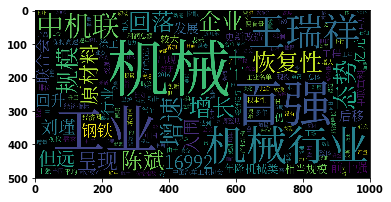

In [46]:
plt.imshow(wc_x)

In [47]:
from PIL import Image
import numpy as np 

In [48]:
img = np.array(Image.open('image_01.jpg'))

In [49]:
font_path = '/Users/tracy/GithubFiles/datasource-master/SourceHanSerifSC-Regular.otf'
wc = wordcloud.WordCloud(
    font_path = font_path,
    mask = img,
    background_color='white'
)

In [50]:
wc_x = wc.generate_from_frequencies(machine_news_keywords_dict)

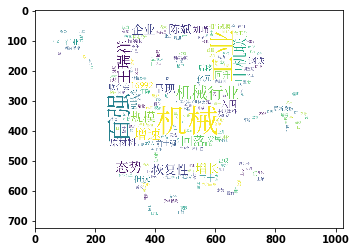

In [51]:
plt.imshow(wc_x)

## TFIDF Vectorize
文本特征提取
### Scikit_learn TFIDF 和简单的分类模型 （计算的是归一化的结果，排除文章长短的影响）

$$ sim(d_1,d_2) = \frac{\vec{V}(d_1)\cdot\vec{V}(d_2)}{|\vec{V}(d_1)||\vec{V}(d_2)|}$$

文本向量化之后，相似度用cos的夹脚来计算，夹脚越小相似度越高

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorized = TfidfVectorizer(max_features=1000)

In [54]:
sample_num = 1000
sub_samples = new_content[:sample_num]

In [55]:
X = vectorized.fit_transform(sub_samples)

In [56]:
X.shape

(1000, 1000)

In [61]:
word_2_id = vectorized.vocabulary_

In [62]:
word_2_id['今天']

153

In [63]:
id_2_word = {d: w for w, d in word_2_id.items()}

In [64]:
id_2_word

{662: '此外',
 4: '12',
 507: '手机',
 7: '15',
 608: '更新',
 294: '发布',
 452: '开发',
 466: '影响',
 758: '确保',
 307: '可以',
 976: '集中',
 211: '全部',
 933: '进行',
 427: '工作',
 618: '有人',
 117: '主要',
 756: '研发',
 287: '去年',
 59: '一年',
 596: '时候',
 463: '当然',
 221: '关于',
 198: '信息',
 498: '我们',
 917: '还是',
 185: '作为',
 941: '通过',
 0: '10',
 439: '平台',
 87: '不会',
 331: '因为',
 813: '考虑',
 650: '核心',
 160: '他们',
 514: '找到',
 67: '一种',
 585: '方案',
 524: '报道',
 432: '已经',
 528: '拿到',
 49: '一些',
 607: '更好',
 888: '资料',
 601: '显示',
 174: '传统',
 31: '30',
 770: '空间',
 154: '今年',
 987: '预计',
 140: '产品',
 303: '只是',
 454: '开始',
 627: '未来',
 931: '进入',
 661: '此前',
 735: '电池',
 308: '可能',
 619: '有关',
 533: '按照',
 742: '目前',
 527: '拥有',
 551: '摄像头',
 651: '根据',
 142: '京东',
 448: '应该',
 925: '这是',
 10: '18',
 340: '地区',
 679: '汽车',
 579: '新华社',
 865: '记者',
 647: '标题',
 376: '女子',
 697: '深圳',
 800: '网友',
 605: '暴雨',
 295: '发现',
 477: '快速',
 626: '期间',
 70: '一路',
 946: '那么',
 296: '发生',
 152: '什么',
 69: '一起',
 720

In [65]:
import numpy as np 

In [66]:
len(X[3].toarray()[0].shape)

1

In [67]:
import random

In [68]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [69]:
document_id_1

464

In [70]:
vector_of_d_1 = X[document_id_1].toarray()[0]

In [71]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [72]:
random_choose = random.randint(0,1000)

In [73]:
random_choose

953

In [74]:
new_content[random_choose]

'6 月 18 日   电影   追   踪   剧组 亮相 上海 国际 电影节 活动   导演 李霄峰   主演 罗晋   姜珮瑶   辛鹏 等 出席 红毯   90 后   新晋 小花   姜珮瑶 一身 黑色 裤装 亮相   清爽 干练   当晚   片方 还 首度 曝光 了 先导 预告 及 海报   引发 关注   先导 预告片 与 两张 海报 中   十年 追踪 初露 冰山一角   短短 三十多 秒 的 预告 信息量 极大   姜珮瑶 饰演 的 女主角 萱慧 身着 红裙   静默 读诗   让 人 过目难忘   海报 中   四男 沉静 在   暗杀 剧场   各怀 心事   五张 碎脸 则 拼凑 五张 面孔   每人 都 眼神 放肆 却 心境 不同   追   踪   萱慧 收割 男神   姜珮瑶 获 黄觉 大赞   电影   追   踪   男主角 由 人气 男星 罗晋 担纲   女主角 则 由 新生代 演员 姜珮瑶 出演   除罗晋 外   姜珮瑶 此次 还 与 黄觉   聂远   杨一威   刘陆 等 一众 演技 出色 的   戏骨   合作   实力派   戏骨   与 新 力量 同台 飚 戏   非常 值得 期待   影片 讲述 了 一场 犯罪 爱情故事   十年 前   两 男 联手 犯下 罪行   得手 后 各奔前程   相约 永不 再见   十年 后   两人 再度 相遇   开始 了 新 的 角逐   一向 喜欢 发掘 新 演员 的 李霄峰 在   追   踪   再次 大量 启用 新人   姜珮瑶 此次 出演 女主角 萱慧   看来 也 是因为 导演   眼刁   一眼 相中 姜珮瑶 来 诠释 萱慧 这个 人物   刚刚 出道 的 姜珮瑶 外形 出众   专业 功底 扎实   演技 受到 诸多 导演 肯定   接连 出演 几部 作品 的 主要 角色   黄觉 这样 评价 姜珮瑶   第二天 到 了 现场 直接 拍戏   才 把 女主角 看个 仔细   啊   惊为天人   每个 角度 都 能 呈现出 很 不 一样 的 味道   心想   导演 眼光 够 刁毒 的   哪儿 找 的 这么 个人   然后 每天 拍戏 的 剩余时间   我 就 在 拍 她   能够 被 黄觉 选中 作为 摄影 创作 的 对象   姜珮瑶 的 独特 气质 可见

In [75]:
from scipy.spatial.distance import cosine

In [76]:
def distance(v1,v2) :return cosine(v1,v2)

In [77]:
distance([1,1],[1,2])

0.05131670194948623

In [78]:
distance(X[random_choose].toarray()[0],X[document_id_1].toarray()[0])

0.9799008092882062

In [79]:
distance(X[random_choose].toarray()[0],X[document_id_2].toarray()[0])

0.9692853103758273

In [80]:
sorted(list(range(1000)),key=lambda i: distance(X[random_choose].toarray()[0],X[i].toarray()[0]))

/Users/tracy/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:702: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[953,
 302,
 63,
 109,
 84,
 75,
 107,
 108,
 48,
 36,
 123,
 62,
 33,
 43,
 114,
 72,
 96,
 35,
 27,
 7,
 37,
 116,
 110,
 45,
 42,
 11,
 95,
 61,
 60,
 8,
 86,
 65,
 46,
 19,
 77,
 68,
 30,
 81,
 85,
 115,
 66,
 52,
 124,
 54,
 69,
 31,
 99,
 76,
 12,
 67,
 47,
 102,
 113,
 98,
 38,
 22,
 4,
 49,
 21,
 104,
 64,
 28,
 20,
 2,
 78,
 125,
 93,
 101,
 111,
 13,
 15,
 29,
 3,
 39,
 83,
 0,
 57,
 121,
 80,
 17,
 71,
 26,
 97,
 51,
 1,
 73,
 14,
 9,
 106,
 55,
 5,
 105,
 91,
 41,
 34,
 56,
 23,
 112,
 24,
 40,
 18,
 122,
 70,
 16,
 59,
 119,
 90,
 92,
 118,
 79,
 10,
 94,
 6,
 89,
 120,
 58,
 44,
 117,
 25,
 32,
 50,
 53,
 74,
 82,
 87,
 88,
 100,
 103,
 158,
 372,
 154,
 152,
 168,
 280,
 349,
 252,
 255,
 329,
 290,
 269,
 352,
 259,
 257,
 316,
 270,
 279,
 369,
 371,
 254,
 341,
 303,
 301,
 253,
 346,
 299,
 307,
 274,
 300,
 312,
 261,
 288,
 283,
 306,
 345,
 323,
 267,
 311,
 266,
 363,
 366,
 377,
 286,
 310,
 328,
 332,
 364,
 354,
 368,
 370,
 342,
 339,
 359,
 281,
 367,
 297,


In [81]:
new_content[577]

'今   23   日   重庆市 2017 年 全国 普通高校 各类 招生 录取 最低 控制 分数线   已经 由 重庆市 第二次 高校 招生 考试 专题 工作 会议 审议 通过   现 公布 如下   一   普通 文   理类   1   文史类   本科 第一批   525 分   本科 第二批   436 分   高职 专科 批   140 分   2   理工类   本科 第一批   492 分   本科 第二批   395 分   高职 专科 批   140 分   二   艺术类   一   本科 批   1   美术 类   322 分   2   音乐学   含 师范   音乐 理论   作曲   录音 艺术 等   351 分   3   音乐学   非 师范   280 分   4   音乐 表演   声乐   钢琴   器乐   通俗 流行音乐   280 分   5   编导 类   广播电视 编导   戏剧 影视 文学   戏剧 影视 导演   390 分   6   播音 与 主持   379 分   7   表演   影视   340 分   8   舞蹈 类   舞蹈 学   舞蹈 表演   舞蹈 编导   219 分   二   高职 专科 批   1   美术 类   100 分   2   音乐学   师范   212 分   3   音乐学   非 师范   150 分   4   音乐 表演   声乐   钢琴   器乐   通俗 流行音乐   150 分   5   编导 类   广播电视 编导   戏剧 影视 文学   戏剧 影视 导演   242 分   6   播音 与 主持   232 分   7   表演   影视   220 分   8   舞蹈 类   舞蹈 学   舞蹈 表演   舞蹈 编导   100 分   9   高职 对口 艺术类   140 分   三   体育类   1   本科 第一批   文考 成绩   349 分   体考 成绩   91 分   2   本科 第二批   文考 成绩   321 分   体考 成绩   82 分   3   高职 专科 批   文考 成绩   165 分   体考 成绩   79 分   四   高职 对口 类   一   高职 对口 类 本科   1

In [82]:
new_content[390]

'通过 了 资格 审查   笔试 面试 成绩 第一   纪元 以为 自己 铁定 要 被 录用 了   不料 突然 接到 通知   专业 不符   她 的 录用 资格 被 江苏 徐州市 人 社局 取消 了   对此   从 电话 抗议 到 局长 信箱   从 行政复议 到 司法 诉讼   纪元 的 申诉 绕 了 一圈 又 一圈   始终 在 维权 迷宫 里 兜圈子   中国青年报   6 月 21 日   事件 一出   各大 媒体 争相 报道   在 采访 时 三方 各执一词   纪元 的 研究生 专业 是   比较文学 与 世界 文学   而 此次 招考 要求 的 专业 是   中国 语言文学   纪元 表示   中国 找不出 一个 硕士 研究生   毕业证书 上 专业 那栏 写 着   中国 语言文学   自己 专业 符合 审核 标准   审核 单位 人 社局 工作人员 则 称   按照   2016 年 徐州市 公务员 招录 考试 专业 参考 目录   纪元 所学 专业   比较文学 与 世界 文学   与   中国 语言文学   专业 处于 并列 关系   不予认定 合法 合理   用人单位 徐州市 城乡 建设局 向 人 社局 说明   纪元 所学 专业 属于 招聘 科目 范围   应 重新考虑   公说公有理 婆说婆有理   每 一方 似乎 都 是 按 规矩 办事   没 毛病   可 对 纪元 来说   进 编制 是 一辈子 的 事   让 个人 来 背 专业 认定 模糊 这口 黑锅 明显 是 不 恰当 的   点击 图片 进入 下 一页   人 社局 因 专业 不符 取消 报考 人 录用 资格 是 职责所在   根据   徐州市 市区 属 事业单位 2016 上半年 公开 招聘 公告   规定   各 主管部门   单位   负责 本 部门   单位   的 报考 资格 复审 把关 工作   市 组织   人 社部 负责 监督 指导 和 审判 工作'

## Boolean Search Engine 布尔搜索引擎

Boolean search   
主要为了提高搜索速度

Input:words  
Output: Documents

将文字转换成0和1，形成矩阵模式进行搜索

In [83]:
bin(90)  #二进制转换

'0b1011010'

In [84]:
bin(80)

'0b1010000'

In [85]:
bin(80 & 90)

'0b1010000'

In [86]:
def naive_search(keywords):    #普通的文字搜索方法
    news_id = [i for i, n in enumerate(new_content) if all(w in n for w in keywords)]
    return news_id
    #O(D * w)

In [87]:
temp = naive_search('美军 航母 司令'.split())

In [88]:
temp

[2844,
 21484,
 21523,
 21784,
 21901,
 22987,
 33522,
 33770,
 34532,
 34887,
 37846,
 38049,
 38096,
 45474,
 45507,
 87483,
 88997]

In [89]:
new_content[2844]

'参考消息 网 6 月 15 日 报道   日本   每日 新闻   6 月 14 日 发表 题为   日本 欲 邀请 海外 大学 和 科研机构 参与 本国 防卫 研究   的 报道 称   关于 从 大学 等 公开 招募 可 应用 于 防卫 装备 品 的 尖端 研究   并 支付 研究 委托 费 的   安全 保障 技术 研究 推进 制度   防卫 装备 厅 已 开始 研究 与 国际 制度 接轨   设想 是   将 委托 对象 从 目前 的 只限 国内   扩大 至 海外 的 大学 和 企业   该 制度 被 很多 人 批评 是   用于 军事 研究   作为 科学家 代表 机构 的 日本 学术会议 3 月 发表声明 指出   从 学术 健康 发展 角度看   存在 很多 问题   防卫 装备 厅 的 方针 料想 将会 引起 轩然大波   该 制度 中   公开 招募 的 规定 是   研究 代表人 需要 是 日本 国籍   对象 限定 为 大学   研究 机构   企业   然而   防卫 装备 厅 认为   要 想 维持 和 提高 与 安全 保障 有关 的 技术 的 优势   需要 招募 更 广泛 的 尖端 研究 机构   因此   防卫 装备 厅 准备 参考 美军 向 海外 研究者 提供 研究 资金 的 制度   并 考虑 与 美国 等 盟国 建立 共同 资金 制度   日本 防卫 装备 厅 防卫 技术 总监 外园 博一 13 日 在 千叶县 海洋 领域 国际 装备 展销会 上 发表 演讲   面对 各国 军人 和 军工企业 相关 人士 表示   希望 发展 制度   使 其 能够 国际性 地 提供 资金   反对 军事 研究 的 名古屋 大学 宇宙 物理学 名誉教授 池内 了 批评 说   到底 要 模仿 美国 到 何时   感觉 这是 通过 集体 自卫权 推进 与 盟国 一体化 的 一环   是 旨在 实现 装备 品 共同开发 的 危险 动向   原 海上 自卫队 自卫 舰队 司令 香田洋 二 表示   技术 的 问题 在于 如何 使用   从 海外 公开 招募 研究 不 存在 国家 利益 上 的 问题   但 在 现行制度 的 预算 规模 和 框架 下   海外 知名 大学 不会 满意   应该 不会 应招   点击 图片 进入 下 一页   6 月

### Input word --> the documents which contain this word

In [90]:
X.shape

(1000, 1000)

In [91]:
transposed_x = X.transpose().toarray()

In [92]:
word_2_id = vectorized.vocabulary_

In [93]:
sorted(word_2_id,key= lambda x : word_2_id.keys())

['此外',
 '12',
 '手机',
 '15',
 '更新',
 '发布',
 '开发',
 '影响',
 '确保',
 '可以',
 '集中',
 '全部',
 '进行',
 '工作',
 '有人',
 '主要',
 '研发',
 '去年',
 '一年',
 '时候',
 '当然',
 '关于',
 '信息',
 '我们',
 '还是',
 '作为',
 '通过',
 '10',
 '平台',
 '不会',
 '因为',
 '考虑',
 '核心',
 '他们',
 '找到',
 '一种',
 '方案',
 '报道',
 '已经',
 '拿到',
 '一些',
 '更好',
 '资料',
 '显示',
 '传统',
 '30',
 '空间',
 '今年',
 '预计',
 '产品',
 '只是',
 '开始',
 '未来',
 '进入',
 '此前',
 '电池',
 '可能',
 '有关',
 '按照',
 '目前',
 '拥有',
 '摄像头',
 '根据',
 '京东',
 '应该',
 '这是',
 '18',
 '地区',
 '汽车',
 '新华社',
 '记者',
 '标题',
 '女子',
 '深圳',
 '网友',
 '暴雨',
 '发现',
 '快速',
 '期间',
 '一路',
 '那么',
 '发生',
 '什么',
 '一起',
 '现场',
 '一位',
 '90',
 '青年',
 '介绍',
 '16',
 '正在',
 '附近',
 '接到',
 '随后',
 '寻找',
 '方向',
 '另外',
 '一名',
 '交流',
 '离开',
 '愿意',
 '接受',
 '继续',
 '市民',
 '为了',
 '一边',
 '群众',
 '警方',
 '提供',
 '一份',
 '视频',
 '了解',
 '25',
 '出现',
 '监控',
 '当时',
 '不少',
 '车辆',
 '速度',
 '依然',
 '一辆',
 '但是',
 '没有',
 '或者',
 '看到',
 '这样',
 '情况',
 '大家',
 '办法',
 '面对',
 '这一',
 '表示',
 '根本',
 '感觉',
 '突然',
 '控制',
 '只能',
 '不断',
 '遭遇',
 '帮助',
 '来说',
 '然后',
 '照片

In [94]:
id_2_word = {d:w for w ,d in word_2_id.items()}

In [95]:
id_2_word[287]

'去年'

In [96]:
set(np.where(transposed_x[287])[0])

{0,
 4,
 6,
 24,
 28,
 30,
 46,
 47,
 55,
 63,
 65,
 68,
 90,
 96,
 97,
 101,
 109,
 112,
 124,
 138,
 157,
 158,
 159,
 168,
 182,
 188,
 191,
 195,
 202,
 222,
 227,
 242,
 243,
 245,
 253,
 255,
 260,
 273,
 286,
 292,
 293,
 334,
 343,
 350,
 366,
 371,
 374,
 377,
 389,
 395,
 397,
 408,
 411,
 413,
 414,
 422,
 423,
 425,
 428,
 444,
 447,
 470,
 481,
 499,
 500,
 527,
 532,
 539,
 543,
 560,
 580,
 598,
 606,
 616,
 635,
 643,
 647,
 651,
 660,
 663,
 665,
 673,
 676,
 684,
 685,
 686,
 688,
 690,
 692,
 699,
 700,
 704,
 710,
 714,
 727,
 734,
 755,
 771,
 777,
 780,
 791,
 809,
 810,
 821,
 827,
 832,
 834,
 844,
 849,
 875,
 876,
 880,
 881,
 882,
 899,
 904,
 908,
 913,
 914,
 918,
 922,
 927,
 930,
 944,
 968,
 976,
 982,
 998}

In [97]:
word_2_id['去年']

287

In [98]:
word_2_id['今年']

154

In [99]:
this_year = set(np.where(transposed_x[287])[0])

In [100]:
last_year = set(np.where(transposed_x[157])[0])

In [101]:
combine = this_year & last_year

In [102]:
combine

{97,
 157,
 191,
 245,
 255,
 273,
 374,
 389,
 414,
 425,
 428,
 527,
 643,
 663,
 665,
 673,
 685,
 700,
 777,
 791,
 809,
 918}

In [103]:
from functools import reduce

In [104]:
d1, d2, d3 = {1,2,3}, {3,4,5,6},{1,3,4}

In [105]:
from operator import and_

In [106]:
reduce(and_, [d1,d2,d3])

{3}

In [107]:
len(word_2_id)

1000

In [108]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    
    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
        set(np.where(transposed_x[id])[0] for _id in candidates_ids)
    ]
    
    merged_documents = reduce(and_, documents_ids)
    
    #获取哪些文档存在这些词语
    sorted_documents_id = sorted(merged_documents,key=lambda i: distance(query_vec,X[i].toarray()))
    
    return sorted_documents_id

In [109]:
np.where(vectorized.transform(['美联储 加息 次数']).toarray()[0])

(array([806]),)

In [110]:
import re

In [111]:
text = '美国有线电视新闻网援引美国军方官员的话说'

In [112]:
pat = r'(新闻|官员)'

In [113]:
re.compile(pat).sub(repl='**\g<1>**',string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [114]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [115]:
get_query_pat('美军 司令 航母')

re.compile(r'(美军|司令|航母)', re.UNICODE)

In [116]:
def highlight_keywords(pat,document):
    return pat.sub(repl='**\g<1>**',string=document)

In [117]:
highlight_keywords(get_query_pat('美军 司令 航母'),content['content'][22987])

'\u3000\u3000新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\\n\u3000\u3000新华社记者刘莉莉\\n\u3000\u3000美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\\n\u3000\u3000（小标题）侧重对地攻击\\n\u3000\u3000据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\\n\u3000\u3000“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\\n\u3000\u3000“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\\n\u3000\u3000据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\\n\u3000\u3000（小标题）配角跻身主角\\n\u3000\u3000第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。\u3000\\n\u3000\u3000资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期

In [118]:
from IPython.display import display, Markdown

In [119]:
def search_engine_with_pretty_print(query):
    candidatas_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query),c)
        
        display(Markdown(title + '\n' + c))
        

In [121]:
search_engine_with_pretty_print('今年 去年')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [2]:
'eee'  

'eee'

## Page Rank
搜索引擎页面排名原理

In [123]:
import networkx as nx
import random
from string import ascii_uppercase
from string import ascii_uppercase

In [124]:
def generate_random_website():
    return ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3,5))]) + '.' + random.choice(['com','cn','net'])

In [125]:
generate_random_website()

'NDEL.com'

In [126]:
websites = [generate_random_website() for _ in range(25)]

In [127]:
random.sample(websites,10)

['FJPW.com',
 'YOI.net',
 'DMF.cn',
 'ZTJK.cn',
 'APJR.net',
 'TJX.net',
 'VUCLL.net',
 'LKH.cn',
 'TTYIV.com',
 'MPVGR.com']

In [130]:
website_connection = {
        websites[0]: random.sample(websites,10),
        websites[1]: random.sample(websites,10),
        websites[2]: random.sample(websites,10),
        websites[3]: random.sample(websites,10),
}

In [131]:
website_network = nx.graph.Graph(website_connection)

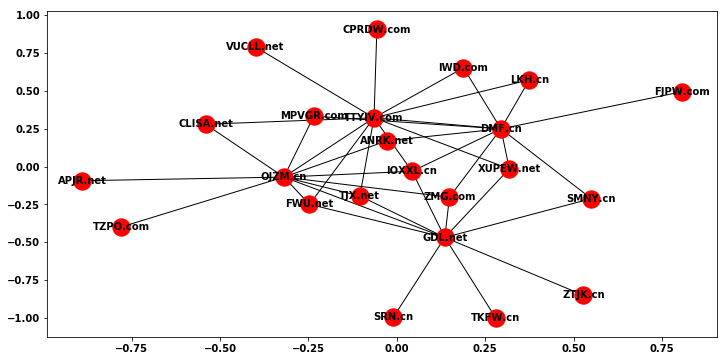

In [134]:
plt.figure(3,figsize=(12,6))
nx.draw_networkx(website_network,font_size=10)

In [135]:
sorted(nx.pagerank(website_network).items(),key=lambda x: x[1],reverse=True)

[('TTYIV.com', 0.1395792196102783),
 ('OJZM.cn', 0.13050906467642256),
 ('GDL.net', 0.12342224992965618),
 ('DMF.cn', 0.11808581152923517),
 ('IOXXL.cn', 0.04702069588334),
 ('ZMG.com', 0.037133969411593165),
 ('TJX.net', 0.03698367672785054),
 ('FWU.net', 0.03698367672785054),
 ('XUPEW.net', 0.0369360931095253),
 ('SMNY.cn', 0.027049366637778467),
 ('ANRK.net', 0.026643361059738937),
 ('MPVGR.com', 0.026643361059738937),
 ('CLISA.net', 0.02649306837599631),
 ('LKH.cn', 0.026445484757671073),
 ('IWD.com', 0.026445484757671073),
 ('ZTJK.cn', 0.017012347482289008),
 ('SRN.cn', 0.017012347482289008),
 ('TKFW.cn', 0.017012347482289008),
 ('APJR.net', 0.016606341904249478),
 ('TZPO.com', 0.016606341904249478),
 ('FJPW.com', 0.016558758285924242),
 ('VUCLL.net', 0.016408465602181614),
 ('CPRDW.com', 0.016408465602181614)]

In [1]:
from ipynb2py import Nbconverter
Nbconverter('Project-01.ipynb')

TypeError: expected str, bytes or os.PathLike object, not NoneType